# Video Game Sales

Analyze sales data from more than 16,500 games.  
source: https://www.kaggle.com/datasets/gregorut/videogamesales  

That dataset contains a list of video games with sales greater than 100,000 
copies. It was generated by a scrape of vgchartz.com.  

_Created on Thu Mar 23 16:32:54 2023_  
__@author: fausto__

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## LOADING DATASET

In [3]:
dataset = pd.read_csv('data/games.csv')

In [4]:
dataset.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## DATA UNDERSTANDING

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
dataset.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


### List Platforms

In [7]:
dataset['Platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

### List Genre

In [8]:
dataset['Genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

### Count games by year of release

In [9]:
gb_year_release = dataset.groupby(['Year_of_Release'])['Year_of_Release'].count()
gb_year_release

Year_of_Release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
2017.0       3
2020.0       1
Name: Year_of_Release, dtype: int64

## DATA VISUALIZATION

In [10]:
def plot_barh(series, title=None, ylabel=None, xlabel=None):
    
    plt.figure(figsize=(15, 11), dpi=75)
    ax = plt.subplot()

    x = series.values
    y = series.index
    ax.barh(y, x)

    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

### Rank Games by Platform

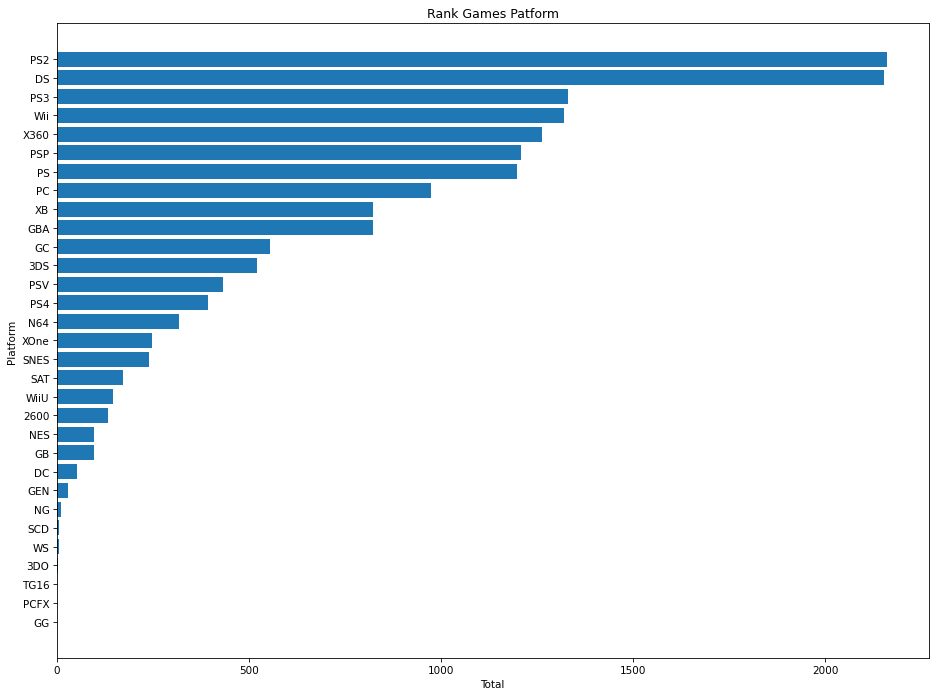

In [11]:
gb_platforms = dataset.groupby(['Platform'])['Platform'].count()
gb_platforms_asc = gb_platforms.sort_values(ascending=True)

plot_barh(gb_platforms_asc, 'Rank Games Patform', 'Platform', 'Total')

### Rank Games by Genre

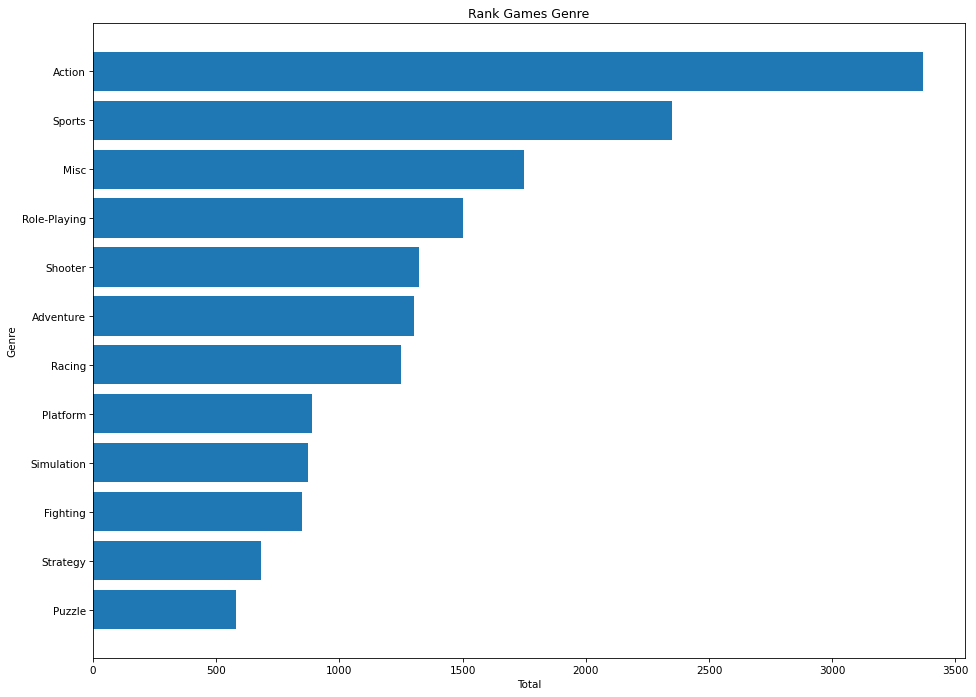

In [12]:
gb_genres = dataset.groupby(['Genre'])['Genre'].count()
gb_genres_asc = gb_genres.sort_values(ascending=True)

plot_barh(gb_genres_asc, 'Rank Games Genre', 'Genre', 'Total')

## DATA PREPARATION

### Feature _Name_

In [13]:
nan_names = dataset[dataset['Name'].isna()]
nan_names

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


#### Remove unnamed games

_Pay attention that games without genre will be removed as well_

In [14]:
dataset.drop(nan_names.index, inplace=True)

In [15]:
count_names = dataset[dataset['Name'].isna()]['Name'].count()
count_genres = dataset[dataset['Genre'].isna()]['Genre'].count()
print("NaN Names=%d, NaN Genres=%d" % (count_names, count_genres))

NaN Names=0, NaN Genres=0


### Feature Publisher

#### NaN Publisher with Developer

_Define the Publisher with the highest occurrence of the Developer company._

In [16]:
def get_highest_publisher(develper):
    '''
    Find the highest occurrence Publisher related with the developer company.
    '''
    data_develper = dataset[dataset['Developer'] == develper]
    count_grouped_publisher = data_develper.groupby(['Publisher'])['Publisher'].count()
            
    if count_grouped_publisher.empty:    
        return None
    else:
        return count_grouped_publisher[count_grouped_publisher == count_grouped_publisher.max()].index[0]


In [17]:
developer = dataset[(dataset['Publisher'].isna()) & (dataset['Developer'].notna())]['Developer']
for item in developer.items():
    index, value = item[0], item[1]
    dataset.loc[index, 'Publisher'] = get_highest_publisher(value)

In [18]:
dataset[(dataset['Publisher'].isna()) & (dataset['Developer'].notna())]['Developer'].count()

1

#### NaN Publisher without Developer

In [19]:
nan_publisher = dataset[dataset['Publisher'].isna()]
dataset.drop(nan_publisher.index, inplace=True)

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16671 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16671 non-null  object 
 1   Platform         16671 non-null  object 
 2   Year_of_Release  16419 non-null  float64
 3   Genre            16671 non-null  object 
 4   Publisher        16671 non-null  object 
 5   NA_Sales         16671 non-null  float64
 6   EU_Sales         16671 non-null  float64
 7   JP_Sales         16671 non-null  float64
 8   Other_Sales      16671 non-null  float64
 9   Global_Sales     16671 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10014 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10095 non-null  object 
 15  Rating           9949 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.2+ MB
